In [2]:
#importation
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import sys
import clean_data
import os

In [3]:
#loading data
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(parent_dir, "data", "Week1_challenge_data_source.csv")                             
db = pd.read_csv(data_path)
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
count_sess_usr=db['MSISDN/Number'].value_counts()
lis=count_sess_usr.values.tolist()
phone_no=count_sess_usr.index.values
sess_freq = dict(zip(phone_no, lis))
print("TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION FREQUENCY\n")
print("Customer Number        session frequency\n")
for key,value in list(islice(sess_freq.items(), 10)):
    print(key,'         ',value)

TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION FREQUENCY

Customer Number        session frequency

33626320676.0           18
33614892860.0           17
33625779332.0           17
33659725664.0           16
33760536639.0           15
33675877202.0           15
33667163239.0           13
33604515716.0           12
33603127838.0           12
33760413819.0           12


In [8]:
count_sess_dur=db.groupby('MSISDN/Number')['Dur. (ms)'].sum()
duration = count_sess_dur.values.tolist()
phone_no=count_sess_dur.index.values
sess_dur = dict(zip(phone_no, duration))

print("TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION DURATION\n")
print("Customer Number  session duration(ms)\n")
for key,value in list(islice(sess_dur.items(), 10)):
    y = (key,'          ',value)
    
user_engagement=pd.DataFrame(columns=['Customer Number' ,'Session Frequency','Session Duration','Total Data Volume'])
user_engagement['Customer Number']=sess_dur.keys()
user_engagement['Session Duration']=user_engagement['Customer Number'].map(sess_dur)
user_engagement['Session Duration'].nlargest(n=10)

TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION DURATION

Customer Number  session duration(ms)



13180    18553754.0
6437      9966898.0
92923     9279434.0
13526     8791927.0
65118     8744914.0
50281     6614270.0
57160     6288730.0
666       6287761.0
66029     5649882.0
92577     5321667.0
Name: Session Duration, dtype: float64

In [9]:
sum_column = db["Total UL (Bytes)"] + db["Total DL (Bytes)"]
db["Total(UL/DL)"] = sum_column
tot_ul_dl=db.groupby('MSISDN/Number')['Total(UL/DL)'].sum()
tot_data = tot_ul_dl.values.tolist()
customer=tot_ul_dl.index.values

tot_customer = dict(zip(customer, tot_data))
print("TEN CUSTOMERS WITH HIGHEST ENGAGMENT IN UPLOAD AND DOWNLOAD DATA VOLUME\n")
print("Customer Number Total data volume(Bytes)\n")
for key,value in list(islice(tot_customer.items(), 10)):
    x = (key,'         ',value)
    
user_engagement['Customer Number']=sess_dur.keys()
user_engagement['Total Data Volume']= user_engagement['Customer Number'].map(tot_customer)
user_engagement['Total Data Volume'].nlargest(n=10)

TEN CUSTOMERS WITH HIGHEST ENGAGMENT IN UPLOAD AND DOWNLOAD DATA VOLUME

Customer Number Total data volume(Bytes)



6437     8.846226e+09
92923    8.514774e+09
13180    8.499621e+09
13526    7.971167e+09
76363    7.891111e+09
37052    7.705863e+09
63028    7.308501e+09
92577    7.132371e+09
57241    6.872018e+09
86455    6.540899e+09
Name: Total Data Volume, dtype: float64

In [10]:
user_engagement.dropna()
user_engagement=pd.DataFrame(columns=['Customer Number' ,'Session Frequency','Session Duration','Total Data Volume'])
user_engagement['Customer Number']=sess_dur.keys()

user_engagement['Session Frequency']=user_engagement['Customer Number'].map(sess_freq)
user_engagement['Session Duration']=user_engagement['Customer Number'].map(sess_dur)
user_engagement['Total Data Volume']= user_engagement['Customer Number'].map(tot_customer)
user_engagement.head(10)

,Customer Number,Session Frequency,Session Duration,Total Data Volume
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09
5,3.360101e+10,2,253983.0,6.152172e+08
6,3.360101e+10,2,128360.0,6.547231e+08
7,3.360101e+10,1,86399.0,3.326604e+08
8,3.360101e+10,2,495702.0,9.901322e+08
9,3.360102e+10,1,124854.0,7.324638e+08


In [11]:
import warnings
warnings.filterwarnings('ignore')
x = user_engagement[['Session Frequency','Session Duration','Total Data Volume']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled,columns=['Session Frequency','Session Duration','Total Data'])

In [12]:
from sklearn.cluster import KMeans
KMean_clust= KMeans(n_clusters=3, init='k-means++',max_iter=1000)
KMean_clust.fit(normalized)

KMeans(max_iter=1000, n_clusters=3)

In [14]:
normalized['Cluster']= KMean_clust.labels_
normalized['Customer Number']= sess_dur.keys()
normalized.sample(10)

,Session Frequency,Session Duration,Total Data,Cluster,Customer Number
4041,0.000000,0.003965,0.028622,1,3.361111e+10
25817,0.000000,0.004261,0.076469,1,3.365067e+10
57762,0.000000,0.006464,0.069752,1,3.366485e+10
103047,0.000000,0.006082,0.038788,1,3.377244e+10
62490,0.058824,0.002710,0.092280,0,3.366627e+10
63565,0.000000,0.000197,0.043408,1,3.366665e+10
31874,0.000000,0.005796,0.043877,1,3.365862e+10
80543,0.000000,0.000464,0.011776,1,3.368429e+10
1341,0.000000,0.004273,0.080354,1,3.360511e+10
25220,0.176471,0.014779,0.252395,2,3.365054e+10


In [15]:
user_metrics=user_engagement[['Session Frequency','Session Duration','Total Data Volume']]
user_metrics['Cluster']=KMean_clust.labels_
clusteredSum = user_metrics.groupby('Cluster').sum()

clusteredSum

,Session Frequency,Session Duration,Total Data Volume
Cluster,,,
0,47071,4.620476e+09,2.434290e+13
1,84579,8.682159e+09,4.021239e+13
2,17285,2.316202e+09,9.278163e+12


In [16]:
user_metrics['Cluster']=KMean_clust.labels_
clus_min = user_metrics.groupby('Cluster').min()
clus_min

,Session Frequency,Session Duration,Total Data Volume
Cluster,,,
0,2,18235.0,2.842182e+08
1,1,7142.0,3.324901e+07
2,3,46896.0,1.085994e+09


In [17]:
user_metrics['Cluster']=KMean_clust.labels_
clus_max = user_metrics.groupby('Cluster').max()
clus_max

,Session Frequency,Session Duration,Total Data Volume
Cluster,,,
0,4,3174824.0,1.873330e+09
1,2,1573420.0,9.507607e+08
2,18,18553754.0,8.846226e+09


In [18]:
user_metrics['Cluster']=KMean_clust.labels_
clus_mean = user_metrics.groupby('Cluster').mean()
clus_mean

,Session Frequency,Session Duration,Total Data Volume
Cluster,,,
0,2.175989,213594.500878,1.125319e+09
1,1.042191,106982.428945,4.955011e+08
2,4.247972,569231.357090,2.280207e+09


In [19]:
# sum up download and upload data for each application
google = db['Google DL (Bytes)']+ db['Google UL (Bytes)']
email = db['Email DL (Bytes)']+ db['Email UL (Bytes)']
gaming = db['Gaming DL (Bytes)']+ db['Gaming UL (Bytes)']
youtube = db['Youtube DL (Bytes)']+ db['Youtube UL (Bytes)']
netflix = db['Netflix DL (Bytes)']+ db['Netflix UL (Bytes)']
social = db['Social Media DL (Bytes)']+ db['Social Media UL (Bytes)']

user_engagement['Google(UL/DL)']=google
user_engagement['Email(UL/DL)']=email
user_engagement['Gaming(UL/DL)']=gaming
user_engagement['Youtube(UL/DL)']=youtube
user_engagement['Netflix(UL/DL)']=netflix
user_engagement['Social(UL/DL)']=social

sumApplicationsDF=user_engagement.groupby('Customer Number')[['Google(UL/DL)','Email(UL/DL)','Netflix(UL/DL)','Social(UL/DL)','Youtube(UL/DL)','Gaming(UL/DL)']].sum()
sumApplicationsDF[['Google(UL/DL)']].sort_values(by ='Google(UL/DL)',ascending=False).head(10)

,Google(UL/DL)
Customer Number,
3.376053e+10,15528782.0
3.366249e+10,15517324.0
3.368482e+10,15508567.0
3.365113e+10,15507131.0
3.360993e+10,15506449.0
3.366356e+10,15506141.0
3.368841e+10,15493921.0
3.369997e+10,15483654.0
3.363264e+10,15481311.0


In [20]:
sumApplicationsDF[['Youtube(UL/DL)']].sort_values(by ='Youtube(UL/DL)',ascending=False).head(10)

,Youtube(UL/DL)
Customer Number,
3.366762e+10,45190078.0
3.376945e+10,45179008.0
3.362999e+10,45170035.0
3.366174e+10,45108826.0
3.362673e+10,45093369.0
3.366816e+10,45091533.0
3.376148e+10,45074469.0
3.366404e+10,45071796.0
3.363651e+10,45049792.0


In [21]:
sumApplicationsDF[['Email(UL/DL)']].sort_values(by ='Email(UL/DL)',ascending=False).head(10)

,Email(UL/DL)
Customer Number,
3.366137e+10,4518036.0
3.369935e+10,4513579.0
3.362843e+10,4513000.0
3.366468e+10,4512730.0
3.365267e+10,4510915.0
3.378103e+10,4510178.0
3.368142e+10,4507049.0
3.366147e+10,4504056.0
3.376363e+10,4502041.0


In [22]:
sumApplicationsDF[['Netflix(UL/DL)']].sort_values(by ='Netflix(UL/DL)',ascending=False).head(10)

,Netflix(UL/DL)
Customer Number,
3.366548e+10,45198153.0
3.366009e+10,45110360.0
3.365071e+10,45064738.0
3.366965e+10,45054355.0
3.366436e+10,45012951.0
3.366402e+10,44998954.0
3.363673e+10,44983646.0
3.369879e+10,44970634.0
3.365096e+10,44915543.0


In [23]:
sumApplicationsDF[['Gaming(UL/DL)']].sort_values(by ='Gaming(UL/DL)',ascending=False).head(10)

,Gaming(UL/DL)
Customer Number,
3.368740e+10,859202784.0
3.367588e+10,859010933.0
3.360923e+10,858902084.0
3.366146e+10,858735183.0
3.366759e+10,858652760.0
3.362335e+10,858562729.0
3.365229e+10,858506410.0
3.366938e+10,858367124.0
3.365182e+10,858199677.0


Text(0.5, 1.0, 'The top three Most Used Applications')

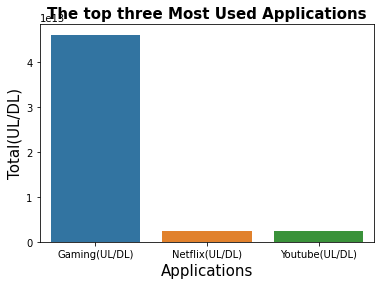

In [24]:
sumApplicationsDF=user_engagement.groupby('Customer Number')[['Google(UL/DL)','Email(UL/DL)','Netflix(UL/DL)','Social(UL/DL)','Youtube(UL/DL)','Gaming(UL/DL)']].sum()
largestApps=sumApplicationsDF[['Google(UL/DL)','Email(UL/DL)','Netflix(UL/DL)','Social(UL/DL)','Youtube(UL/DL)','Gaming(UL/DL)']].sum().nlargest(3)
ax=sb.barplot(largestApps.index, largestApps.values)
ax.set_xlabel('Applications', fontsize=15)
ax.set_ylabel('Total(UL/DL)' , fontsize=15)
ax.set_title('The top three Most Used Applications', fontsize=15, fontweight='bold')

In [26]:
dist = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(normalized)
    dist.append(kmean.inertia_)

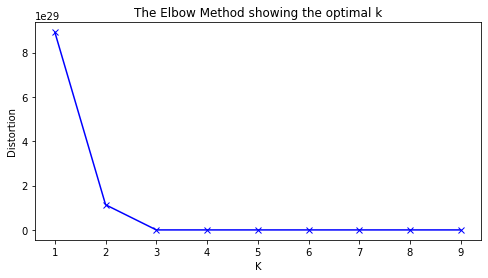

In [27]:
plt.figure(figsize=(8,4))
plt.plot(K, dist, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
kmean = KMeans(n_clusters=k)
kmean.fit(normalized)
normalized['Cluster']= KMean_clust.labels_
normalized

,Session Frequency,Session Duration,Total Data,Cluster,Customer Number
0,0.000000,0.005908,0.095931,1,3.360100e+10
1,0.000000,0.009387,0.014026,1,3.360100e+10
2,0.000000,0.006892,0.063851,1,3.360100e+10
3,0.000000,0.002304,0.044148,1,3.360101e+10
4,0.058824,0.001615,0.161598,0,3.360101e+10
...,...,...,...,...,...
106851,0.000000,0.000090,0.077317,1,3.379000e+10
106852,0.000000,0.007217,0.050727,1,3.379000e+10
106853,0.000000,0.046922,0.022566,1,3.197020e+12
106854,0.000000,0.013258,0.063887,1,3.370000e+14


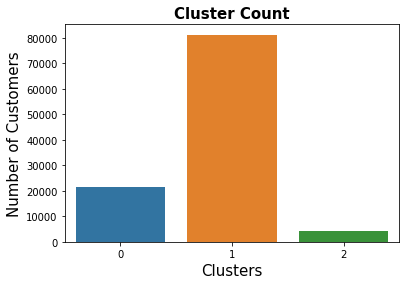

In [29]:
with warnings.catch_warnings(record=True):
    clusteredDF=normalized['Cluster'].value_counts()
    ax=sb.barplot(clusteredDF.index, clusteredDF.values)
    ax.set_xlabel('Clusters', fontsize=15)
    ax.set_ylabel('Number of Customers' , fontsize=15)
    ax.set_title('Cluster Count', fontsize=15, fontweight='bold')
    clusteredDF

In [30]:
user_engagement.to_csv('user_engage.csv')